## CREDIT  CARD  FRAUD DETECTION

In [ ]:
import seaborn as sns
import  pandas  as  pd
from  sklearn.model_selection  import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics  import  accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv('/content/card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.isnull().sum()
df.dropna(inplace=True)


## Spliting Data  In Independent Data and Dependent Data

In [ ]:
# Ensure y is a 1-dimensional array
x=df.iloc[:,:-1]
y = df.iloc[:,-1].squeeze()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)



## Scaling  Data

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

##   Model Trainig : Logistic Regression

In [ ]:
regression = LogisticRegression()
regression.fit(x_train, y_train)


LogisticRegression()

##  Model Evaluation


In [ ]:
# Predict on the test set
test_pred = regression.predict(x_test)

# Accuracy Test Data
accuracy_test = accuracy_score(y_test, test_pred)
print("Accuracy on Test Data:", accuracy_test)

#  Predict on the train set
train_pred=regression.predict(x_train)

#  Accuracy Train Data
accuracy_train=accuracy_score(y_train,train_pred)
print("Accuracy on Train Data:",accuracy_train)


Accuracy on Test Data: 0.955193482688391
Accuracy on Train Data: 0.9596042868920033


##   Confusion Matrix

In [ ]:
# Generate the confusion matrix
cm_test=confusion_matrix(y_test, test_pred)
cm_train=confusion_matrix(y_train, train_pred)
print("Confusion Matrix on Test Data:\n", cm_test)
print("Confusion Matrix on Train Data:\n", cm_train)

Confusion Matrix on Test Data:
 [[6200   55]
 [ 253  366]]
Confusion Matrix on Train Data:
 [[18713   141]
 [  692  1075]]


## HeatMap for Test Data

<Axes: >

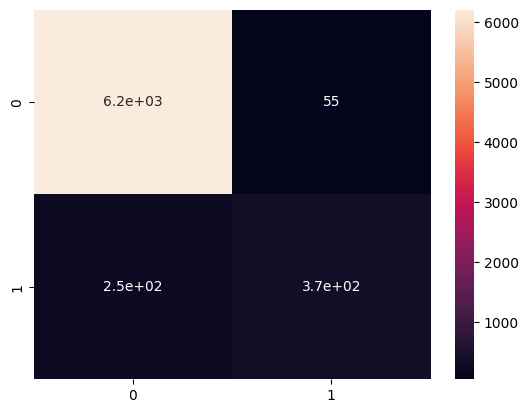

In [ ]:
sns.heatmap(cm_test,annot=True)


##  HeatMap  for Train  Data

<Axes: >

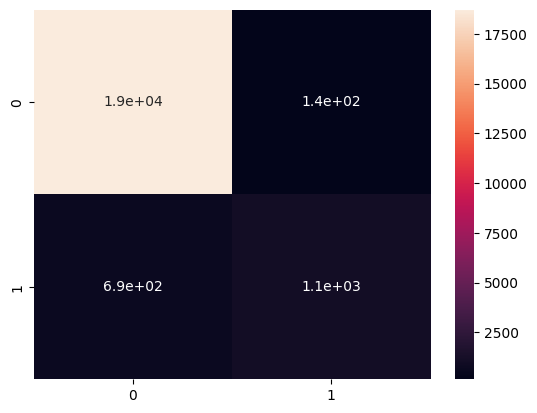

In [ ]:
sns.heatmap(cm_train,annot=True)